In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.manifold as skmanifold
import sklearn

In [2]:
# Load the datasets and print headers
catalog512 = np.load('../data/physCatalog512.npy')
catalog1024 = np.load('../data/physCatalog1024.npy')
catalog2048 = np.load('../data/physCatalog2048.npy')

In [3]:
# Convert to dataframes with mass, volume, radial distance, and magnitude of velocity

# ======================================================================
def converter(catalog):
    # Copy data to the dataFrame
    outputDF = pd.DataFrame()
    
    outputDF['ID']         = catalog['ID']
    outputDF['volume']     = catalog['volume']
    outputDF['mass']       = catalog['mass']
    outputDF['rPosition']  = np.sqrt(catalog['positionX']**2 
                                     + catalog['positionY']**2 
                                     + catalog['positionZ']**2)
    outputDF['zPosition']  = catalog['positionZ'].reshape(-1, 1)
    outputDF['vMag']       = np.sqrt(catalog['velocityX']**2 
                                     + catalog['velocityY']**2 
                                     + catalog['velocityZ']**2)
    outputDF['polarAngle'] = np.arccos(np.abs(outputDF['zPosition'])/outputDF['rPosition'])
    outputDF['resolution'] = catalog['resolution']
    outputDF['time']       = catalog['time']

    return outputDF
# ======================================================================

processed512  = converter(catalog512)
processed1024 = converter(catalog1024)
processed2048 = converter(catalog2048)

In [4]:
# Cut the 512 data set down to a reasonable number of entries for testing
numRows = 1000

catalogSubset = processed512.sample(n=numRows)

In [5]:
# Run t-SNE
# perplexity should be between 5 and 50, analogous to number of neareset neighbors
perp = 100

featureColumns = ['volume','mass','rPosition','vMag', 'polarAngle']#, 'zPosition']
catalogSubsetData = catalogSubset[featureColumns].values

# Rescale data
scaler = sklearn.preprocessing.StandardScaler(with_mean=True, with_std=True)
catalogSubsetData = scaler.fit_transform(catalogSubsetData)

tsneModel   = skmanifold.TSNE(n_components=2, perplexity=perp, init='pca')
tsneResults = tsneModel.fit_transform(catalogSubsetData)

In [6]:
# Add the new columns to catalogSubset
catalogSubset['tsne-0'] = tsneResults[:,0]
catalogSubset['tsne-1'] = tsneResults[:,1]

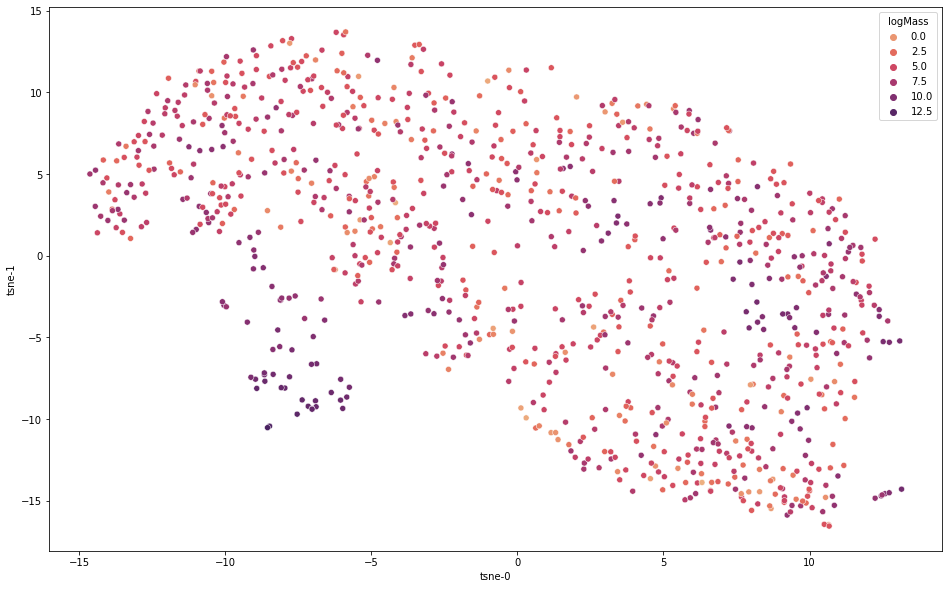

In [7]:
# coloring = 'volume'
# coloring = 'mass'
# coloring = 'rPosition'
# coloring = 'vMag'
# coloring = 'time'

catalogSubset['logMass'] = np.log(catalogSubset['mass'])
coloring = 'logMass'

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-0', 
    y='tsne-1',
    hue=coloring,
    palette='flare',
    data=catalogSubset,
    alpha=1.
)
plt.show()